# Stroop Effect
Project for Data Analyst Nanodegree
By Paul Ogier

# 1. Description of the experiment

## 1.1. Background information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally sized lists. Each participant will go through and record a time from each condition.

## 1.2. Dependent Variable, Independent Variable
What is our independent variable? What is our dependent variable?

The independent variable is the congruence type of the word.  
The dependent variable is the time needed to complete the task. 

## 1.3. Repeated measure design study

From what we can gather, the subjects are tested by measuring two differents times: the time neeeded to read a list of congruent words, and the time needed to read a list of incongruent words.  
- We are dealing with dependent paired samples because the individuals chosen are the same in each sample, before and after changing the independent variable (the congruence of the words)
- The experiment is a repeated measure design study of the participants, because we are taking the same measure on each subject several times
- We don't think that we can call this experiment a pre-test / post-test study because we are not told of any orders in which the times are measured
- We don't think that we can call this experiment a longitudinual study because we are not looking specifically at the historical dimension: we are not looking a the effect of time on the performance, nor are we taking several measure of performance over a period of time


This method helps support the hypothesis that the difference recorded before and after changing the independent variable is only due to this independent variable, by keeping other conditions (gender, age, education level...) being equal. It is a way to avoid any lurking variables

## 1.5. Hypothesis
What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.  
We want to know if it takes more time saying the incongruent words than the congruent words.   
Thus, our null hypothesis is that the mean time neeeded for the congruent words is greater than or equal to the mean time neeeded for the incongruent words.  
$H_0$ is that $\mu_i =< \mu_c$  
The alternative hypothesis is:  
$H_1: \mu_i > \mu_c$  
Because we don't know the exact value of the variance of both groups or the variance of the difference, we will perform a t-test for paired dependent samples

## 1.4. Possible improvments: Adding a control group
A common structure to compare the effect of two treatments can be found below:
- test group: congruent words - incongruent words  
- control group: incongruent words - congruent words
#### Controlling for the order of the measurements
This test structure tries to control for another independant variable: the order in which the time are measured. If the results hold up for both the test group and the control group, then we can say that independently of the order in which the measurements are taken, pronoucing the list of incongruent words takes more time than the list of congruent words. 

# 2. Description of the samples
Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
#loading the file in a Pandas DataFrame
df=pd.read_csv('Stroopdata.csv')

#### Some notations

Mean: $\bar{X_n} =\frac{1}{n} \sum\limits_{n} X_i $  
Corrected standard deviation $ S_{n,c} =\sqrt{ \frac{\sum{(X_i-\bar{x})^2}}{n-1}} $ (used for a sample) which is linked to the standard deviation for a population by the relation $n S^2_n = (n-1) S^2_{n,c}$  

#### rough histogram, rough description

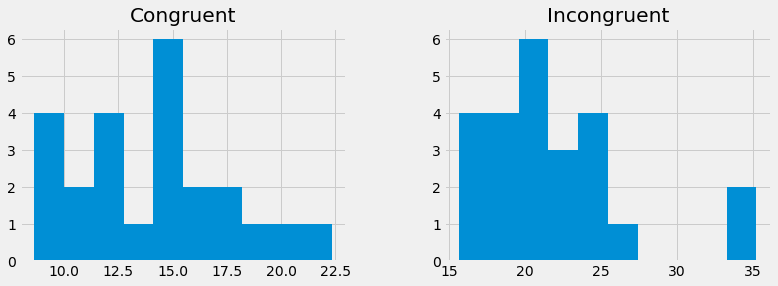

In [2]:
df.hist(figsize=(12,4));

In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


## 2.1. Central Tendency

### 2.1.1. Central Limit Theorem (CLT)
$X_n$  follows a normal law 
$ \bar{X_n} \sim \mathcal{N(\mu,\frac{\sigma}{\sqrt{n}})}$ where $\mu = \mathrm{E}[X]$ and $\sigma = \mathrm{Var}[X]$  
And we define the standard error for the mean 
$ SE = \frac{\sigma}{\sqrt{n}}$  
$X_i \sim \mathcal{N(\mu_i,\frac{\sigma_i}{\sqrt{n_i}})}$  
$X_c \sim \mathcal{N(\mu_c,\frac{\sigma_c}{\sqrt{n_c}})}$  
$\sigma_i \text{ is estimated by: } \sqrt{\frac{SSi}{n_i-1}}$  
$SE_i = \frac{\sigma_i}{\sqrt{n_i}}$

### 2.1.2. Mean, median

In [4]:
centralvalues=pd.DataFrame(columns=df.columns)
centralvalues.loc['mean']=df.mean(axis=0)
centralvalues.loc['median']=df.median(axis=0)

### 2.1.3. Mode
using bins of size 2

In [5]:
mybins = np.arange(0,40,2)
mylabels=(mybins[1:]+mybins[:-1])/2

In [6]:
i_bins=pd.cut(df['Incongruent'],bins=mybins,labels=mylabels).value_counts()
i_bins.name='Incongruent'
c_bins=pd.cut(df['Congruent'],bins=mybins,labels=mylabels).value_counts()
c_bins.name='Congruent'
d_bins=pd.DataFrame([i_bins,c_bins]).transpose()
centralvalues.loc['mode']=d_bins.apply(lambda c:c.idxmax(),axis=0)

### 2.1.4. Graphical Representation

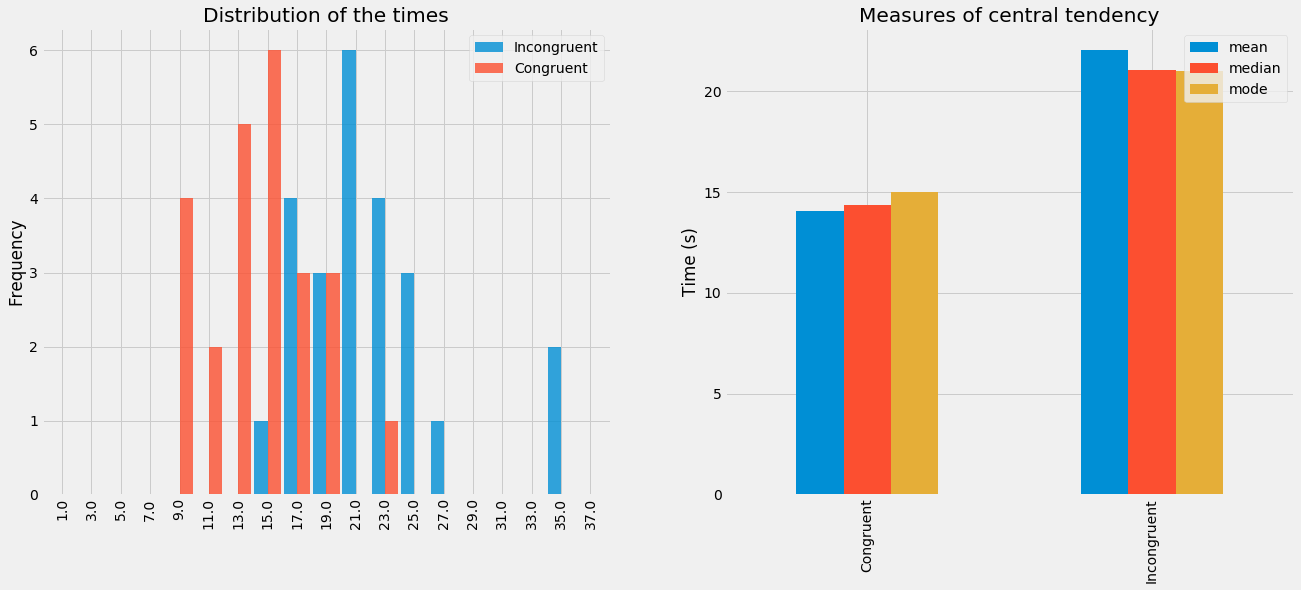

In [7]:
#Initiate the plot
fig = plt.figure(figsize=(20,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

#Plot the histogram
d_bins.plot(kind='bar',width=0.9,alpha=0.8,ax=ax1)
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of the times')
ax1.legend(loc='upper right')

#Plot central tendency
centralvalues.transpose().plot(kind='bar',ax=ax2)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
ax2.set_ylabel('Time (s)')
ax2.set_title('Measures of central tendency')
ax2.legend(loc='upper right');

Observations for both states
- the mean of the incongruent sample is higher than the mean of the congruent sample
- the distribution is somewhat positively skewed (has a long tail on the right)
- the mean, mode, and median, are close to each other
- there are two outliers for the incongruent measure, which would tend to increase the calculated mean over the sample above the expected value from the population

## 2.2. Variability

### 2.2.1. Standard Deviation
using the corrected version of the standard deviation for a sample

In [8]:
variability = pd.DataFrame(columns=df.columns)

In [9]:
# for a sample
variability.loc['std_c'] = df.std(ddof=1,axis=0)
variability.loc['var'] =variability.loc['std_c']**2

### 2.2.2. Standard Error of the mean

In [10]:
variability.loc['sem']=df.std(ddof=1)/np.sqrt(df.shape[0])

### 2.2.3. Graphical Representation

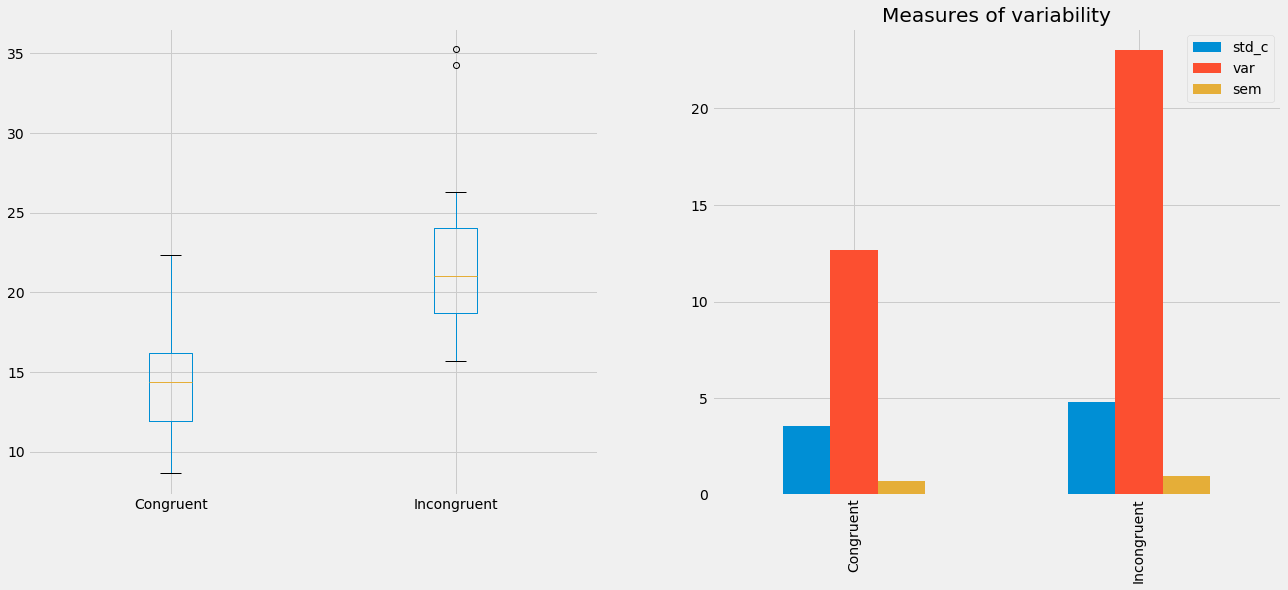

In [11]:
#Initiate the plot
fig = plt.figure(figsize=(20,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

#Boxplot representation
df.boxplot(ax=ax1);

#Measures of variability
variability.transpose().plot(kind='bar',ax=ax2)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
ax2.set_title('Measures of variability')
ax2.legend(loc='upper right');

## 2.3. Outliers

We can already see from the distribution above we have a few outliers. Can we try to identify them?  
Because outliers are not necessarily aberrant values, or errors of measurements, we will not filter them out of our test for the moment

### 2.3.1. Interquartile Range (IQR Rule)
One frequent measure is using the range of the Interquartile Range (IQR)

$IQR = Q_3 - Q_1$  
$min = Q_1 - IQR \cdot 1.5$  
$max = Q_3 + IQR \cdot 1.5$

In [12]:
c='Incongruent'
def show_outliers(y):
    """
    Args:
        y (pd.Series): series where to find outliers
    Returns:
        pd.Series : the outliers value found
    """
    q1=y.quantile(0.25)
    q3=y.quantile(0.75)
    iqr=(q3-q1)
    allowedrange=[q1-1.5*iqr,q3+1.5*iqr]
    allowedrange
    outliers=y.loc[(y<allowedrange[0]) | (y>allowedrange[1])]
    return outliers
outliers=show_outliers(df[c]).index
print(outliers)

Int64Index([14, 19], dtype='int64')


## 2.4. Time for congruent words vs time for incongruent words

### 2.4.1. Linear Regression with outliers

In [13]:
xrangesmall=np.arange(5,30).reshape(-1,1)
xrange=[5,40]

In [14]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
X_train1=df['Congruent'].values.reshape(-1,1)
y_train1 = df['Incongruent'].values
lr1.fit(X=X_train1,y=y_train1)
y_pred1=lr1.predict(xrangesmall)
r_squared_1=lr1.score(X=X_train1,y=y_train1)

### 2.4.2. Linear Regression without outliers

In [15]:
from sklearn.linear_model import LinearRegression
lr2=LinearRegression()
X_train2=df['Congruent'].drop(outliers,axis=0).values.reshape(-1,1)
y_train2 = df['Incongruent'].drop(outliers,axis=0).values
lr2.fit(X=X_train2,y=y_train2,)
y_pred2=lr2.predict(xrangesmall)
r_squared_2=lr2.score(X=X_train2,y=y_train2)

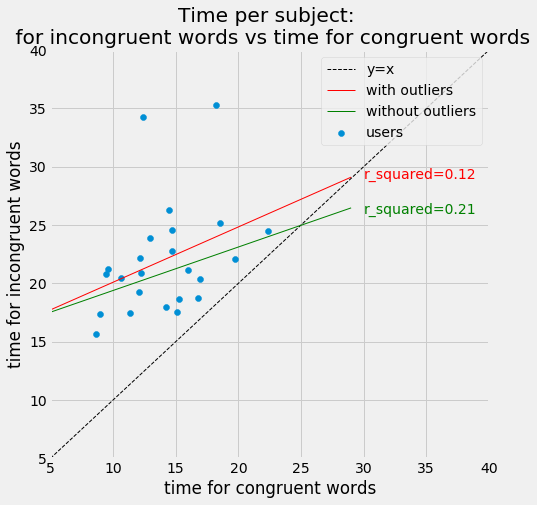

In [16]:
fig,ax=plt.subplots(figsize=(7,7))
ax.set_title("Time per subject: \n for incongruent words vs time for congruent words")
ax.set_xlim(xrange)
ax.set_xlabel('time for congruent words')
ax.set_ylim(xrange)
ax.set_ylabel('time for incongruent words')
ax.scatter(x=df['Congruent'].values,y=df['Incongruent'].values,label='users');
ax.plot(xrange,xrange,'k--',lw=1,label='y=x')
ax.plot(xrangesmall,y_pred1,'r-',lw=1,label='with outliers')
ax.plot(xrangesmall,y_pred2,'g-',lw=1,label='without outliers')
ax.annotate(s='r_squared={}'.format(int(100*r_squared_1)/100),xy=(30,29),color='r')
ax.annotate(s='r_squared={}'.format(int(100*r_squared_2)/100),xy=(30,26),color='g')
ax.legend(loc='upper right')
plt.show()

# 3. Hypothesis testing
perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

## 3.1. Defining the test statistic

Our null hypothesis $H_0$ is that $\mu_i =< \mu_c$  
The alternative hypothesis is $H_1: \mu_i > \mu>c$

Defining the test statistic $X = \bar{X_i} - \bar{X_c}$  
$X = X_i - X_c \sim \mathcal{N}(\mu,\sigma)$   
$H_0 : \mu =< 0$  
$H_1 : \mu > 0$  

In [17]:
df['Diff']=df['Incongruent']-df['Congruent']
print(df['Diff'].describe())

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: Diff, dtype: float64


## 3.2. T-test for paired samples

### 3.2.1. Assumptions

- Dependent, paired samples
- the difference has a normal distribution

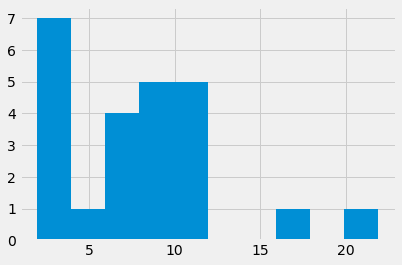

In [18]:
df['Diff'].hist(bins=10);

In [19]:
print(df['Diff'].describe())

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: Diff, dtype: float64


### 3.2.1. Test statistic

$SE = \frac{\sigma}{\sqrt{n}}$  
$\frac{\bar{X}-0}{SE} \sim t(n-1)$  

In [20]:
n=df['Diff'].shape[0]
dof=n-1
sigma_c = df['Diff'].std(ddof=1)
SE=sigma_c/np.sqrt(n)
x_bar=df['Diff'].mean()
t_statistic=(x_bar-0)/SE
print(t_statistic)

8.02070694411


### 3.2.3. Critical Value

In [21]:
alpha=0.01
from scipy.stats import t
t_critical=t.ppf(1-alpha/2,df=dof)
print('t-critical:{}'.format(t_critical))
p_value=2*(1-t.cdf(abs(t_statistic),df=dof))
print('Reject null hypothesis:{}'.format(abs(t_statistic)>t_critical))
print('p-value:{}'.format(p_value))

t-critical:2.8073356837675227
Reject null hypothesis:True
p-value:4.1030005837328076e-08


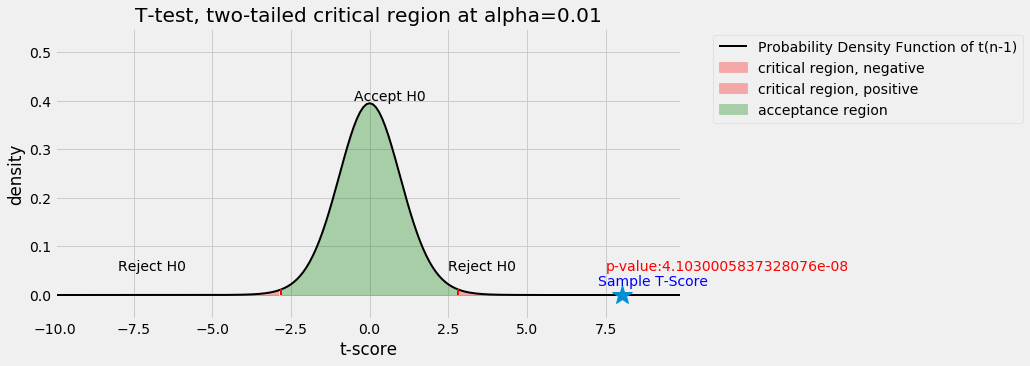

In [22]:
fig,ax=plt.subplots(figsize=(10,5))
xrange=np.arange(-10,10,0.1)

ax.set_title("T-test, two-tailed critical region at alpha={}".format(alpha))
ax.set_xlim(xrange.min(),xrange.max())
ax.set_xlabel('t-score')
ax.set_ylim(-0.05,0.55)
ax.set_ylabel('density')

t_pdf=t.pdf(xrange,df=n-1)
ax.plot(xrange,t_pdf,lw=2,color='black',label='Probability Density Function of t(n-1)')

#Drawing critical region
#negative
x_critical_negative=np.arange(-10,-t_critical,0.1)
ax.fill_between(x=x_critical_negative,
                y1=t.pdf(x_critical_negative,df=dof),
                y2=0,
                label='critical region, negative',
                color='red',
                alpha=0.3
               )
ax.plot((-t_critical,-t_critical),(0,t.pdf(-t_critical,df=dof)),color='red',ls='--',lw=2)

x_critical_positive=np.arange(t_critical,10,0.1)
ax.fill_between(x=x_critical_positive,
                y1=t.pdf(x_critical_positive,df=dof),
                y2=0,
                label='critical region, positive',
                color='red',
                alpha=0.3
               )
ax.plot((t_critical,t_critical),(0,t.pdf(t_critical,df=dof)),color='red',ls='--',lw=2)

#Drawing acceptance region
x_positive=np.arange(-t_critical,t_critical,0.1)
ax.fill_between(x=x_positive,
                y1=t.pdf(x_positive,df=dof),
                y2=0,
                label='acceptance region',
                color='green',
                alpha=0.3
               )
ax.plot((t_critical,t_critical),(0,t.pdf(t_critical,df=dof)),color='red',ls='--',lw=2)

#Drawing the test statistic
ax.plot(t_statistic,t.pdf(t_statistic,df=dof),marker='*',ms=20)
ax.annotate(s='Sample T-Score',xy=(7.25,0.02),color='blue')
ax.annotate(s='p-value:{}'.format(p_value),xy=(7.5,0.05),color='red')
ax.annotate(s='Reject H0',xy=(-8,0.05))
ax.annotate(s='Reject H0',xy=(2.5,0.05))
ax.annotate(s='Accept H0',xy=(-0.5,0.40))
#Legend
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left");

The results show that the test statistic is far away from the acceptance region.
Thus, we are very confident that we can reject the null hypothesis. It takes more time to prononce incongruent words than congruent words. The results match our expectations, as the difference between the two was firmly marked in the plots above.

# 4. Discussion
Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

## 4.1. Cause of the effect using "Thinking, Fast and Slow" 
The cause of the effect observed is a cognitive dissonance between the word read, and the color seen.
It can be explained by using Kahneman's classification of the brain as the coexistence of two thoughts systems:
- System 1: Fast, automatic, frequent, emotional, stereotypic, subconscious. System 1 will activate the information "blue" when looking at a blue object, or 'red' when reading the word "red". In the congruent words, System 1 will be activated.
- System 2: Slow, effortful, infrequent, logical, calculating, conscious. With incongruent words, System 2 will be activated to manually override the conflicting information coming from System 1, significantly slowing down the process.

Which brings us to another question: how do those results compare to a list containing color names, all in a neutral color ('black'), and to a list containing neutral words in different colors? System 1 will be activated, for sure, but is reading a color name quicker or slower than designating a color name?  
From Wikipedia: https://en.wikipedia.org/wiki/Stroop_effect#Theories:  
- It seems that the "reading" processing time is quicker than the "recognizing a color" processing time

## 4.2. A similar task
We believe a similar task would be to count the number of dots, while being exposed to another number via another sensory channel (for example, hearing "four" when seeing three dots). In this case also, the person would have to discriminate between multiple and conflicting sources of informations.  
Astronauts, jet pilots, and other professions who are exposed simultaneously to a high number of information sources, possibly conflicting, while having to take split-seconds decisions, may be tested during their evaluation process to similar tests.

## 4.3. Measure of significance

### 4.3.1. Cohen's d
${d} = \frac{(\bar{x} - \mu)}{S}$

In [23]:
d=x_bar/sigma_c
print(d)

1.6372199491222625


Cohen's d suggests a very large effect

### 4.3.2. R squared
$R^{2} = \frac{t^2}{t^2 + df}$ 

In [24]:
r_squared=(t_critical**2)/(t_critical**2+dof)
print(r_squared)

0.255208689321
